In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from mpl_toolkits import mplot3d
#import libs

In [44]:
from pandas import read_csv

path = "data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path,header = [0])
data


,M2,PMI,GDP,P,PE,profit,5per,res_mon,amount,discount
0,-1.120925,31.022327,213922.0231,-2.838272,25.636380,15.768468,5.748460,15.140673,7.626652,87.9900
1,0.778794,31.022327,188708.7195,113.394159,50.930306,-0.047013,30.391620,6.022020,7.362974,99.3300
2,0.246873,31.098315,200873.0027,18.301806,38.437501,19.360059,45.946522,-3.096633,5.403937,80.0000
3,-1.500869,31.174304,213922.0231,6.546342,4.582304,18.855991,32.108966,-3.096633,4.570304,85.6397
4,-1.348892,30.034473,220298.4692,20.520678,16.555828,45.978634,9.973436,6.022020,4.173182,80.0000
...,...,...,...,...,...,...,...,...,...,...
388,1.766648,28.818652,254934.6849,0.132889,63.776095,-7.655960,39.533069,1.462693,-0.802459,91.9400
389,0.322861,28.362719,222232.0036,0.041703,7.078615,-7.655960,43.385700,6.022020,-0.815597,81.9421
390,1.462693,29.578540,233754.6375,0.125291,8.427012,-7.655960,38.996969,6.022020,-0.816047,80.0000
391,1.006760,30.490405,222232.0036,4.403459,17.801847,-7.655960,28.704669,6.022020,-0.819965,91.5300


In [45]:
round(data.corr(), 2)

,M2,PMI,GDP,P,PE,profit,5per,res_mon,amount,discount
M2,1.00,-0.00,-0.08,-0.11,-0.06,-0.21,-0.08,-0.07,-0.12,-0.19
PMI,-0.00,1.00,-0.25,-0.04,0.09,0.20,-0.03,-0.10,-0.07,-0.22
GDP,-0.08,-0.25,1.00,0.05,-0.03,-0.03,-0.03,-0.15,0.04,0.09
P,-0.11,-0.04,0.05,1.00,0.16,-0.01,0.05,-0.09,0.17,0.18
PE,-0.06,0.09,-0.03,0.16,1.00,-0.02,0.00,-0.05,0.00,-0.01
profit,-0.21,0.20,-0.03,-0.01,-0.02,1.00,0.20,-0.01,0.04,-0.02
5per,-0.08,-0.03,-0.03,0.05,0.00,0.20,1.00,0.03,0.00,-0.07
res_mon,-0.07,-0.10,-0.15,-0.09,-0.05,-0.01,0.03,1.00,0.08,0.04
amount,-0.12,-0.07,0.04,0.17,0.00,0.04,0.00,0.08,1.00,0.01
discount,-0.19,-0.22,0.09,0.18,-0.01,-0.02,-0.07,0.04,0.01,1.00


In [46]:
pd.options.display.max_columns = 10

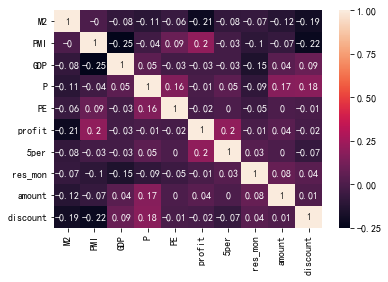

In [47]:
sns.heatmap(round(data.corr(), 2),annot=True)

In [48]:
####数据标准化####
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)


Text(0.5,1,'PVE')

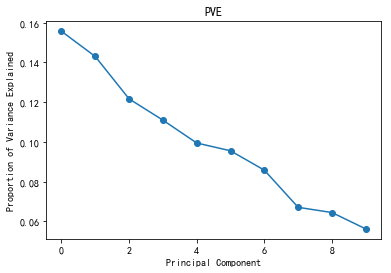

In [49]:
model = PCA()
model.fit(X)
#每个主成分能解释的方差
model.explained_variance_
#每个主成分能解释的方差的百分比
model.explained_variance_ratio_
#可视化
plt.plot(model.explained_variance_ratio_, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('PVE')

In [50]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

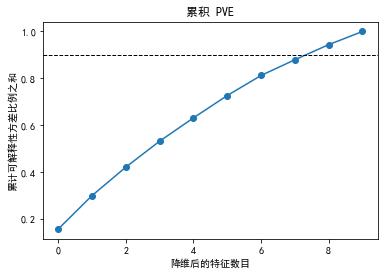

In [51]:
plt.plot(model.explained_variance_ratio_.cumsum(), 'o-')
plt.xlabel('降维后的特征数目')
plt.ylabel('累计可解释性方差比例之和')
plt.title('累积 PVE')
# plt.xlabel('Principal Component')
# plt.ylabel('Cumulative Proportion of Variance Explained')
# plt.title('Cumulative PVE')
plt.axhline(0.9, color='k', linestyle='--', linewidth=1)

In [52]:
#主成分核载矩阵
model.components_
 
columns = ['PC' + str(i) for i in range(1, 11)]
 
pca_loadings = pd.DataFrame(model.components_, columns=data.columns, index=columns)
round(pca_loadings, 2)

,M2,PMI,GDP,P,PE,profit,5per,res_mon,amount,discount
PC1,-0.34,-0.47,0.40,0.40,0.04,-0.08,-0.00,0.03,0.29,0.51
PC2,-0.46,0.36,-0.18,0.21,0.20,0.59,0.39,0.02,0.20,-0.03
PC3,-0.14,-0.27,-0.10,-0.42,-0.53,0.17,0.22,0.60,0.06,0.06
PC4,0.04,0.08,-0.55,0.21,0.31,-0.31,-0.27,0.53,0.31,0.08
PC5,0.31,-0.16,0.16,0.15,-0.07,-0.10,0.33,-0.03,0.63,-0.55
PC6,-0.19,0.29,0.13,-0.13,-0.36,0.17,-0.67,-0.14,0.46,-0.05
PC7,-0.31,-0.08,0.41,-0.45,0.59,-0.04,-0.13,0.25,-0.00,-0.32
PC8,-0.62,0.10,-0.16,0.02,-0.24,-0.62,0.18,-0.19,-0.06,-0.24
PC9,0.00,0.26,0.39,0.53,-0.21,0.01,-0.12,0.47,-0.35,-0.29
PC10,-0.18,-0.61,-0.34,0.22,-0.01,0.31,-0.32,-0.13,-0.20,-0.43


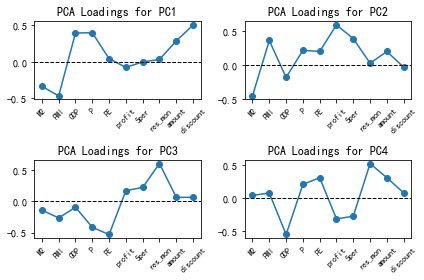

In [53]:
# Visualize pca loadings
 
fig, ax = plt.subplots(2, 2)
plt.subplots_adjust(hspace=1, wspace=0.5)   
for i in range(1, 5):
    ax = plt.subplot(2, 2, i)
    ax.plot(pca_loadings.T['PC' + str(i)], 'o-')
    ax.axhline(0, color='k', linestyle='--', linewidth=1)
    ax.set_xticks(range(10)[::1])
    ax.set_xticklabels(data.columns, rotation=45, fontsize=8)
    plt.tight_layout()
    ax.set_title('PCA Loadings for PC' + str(i))

Text(0.5,1,'Biplot')

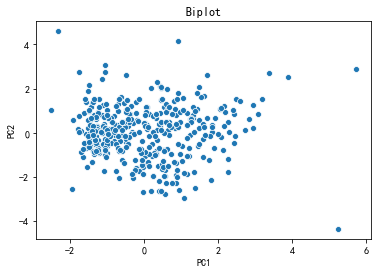

In [54]:
# PCA Scores
 
pca_scores = model.transform(X)
pca_scores = pd.DataFrame(pca_scores, columns=columns)
pca_scores.shape
pca_scores.head()
#前两个主成分的可视化
# visualize pca scores via biplot
 
sns.scatterplot(x='PC1', y='PC2', data=pca_scores)
plt.title('Biplot')

Text(0.5,0,'PC3')

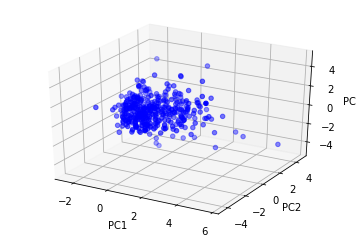

In [21]:
# Visualize pca scores via triplot
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_scores['PC1'], pca_scores['PC2'], pca_scores['PC3'], c='b')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

Text(0.5,0,'PC3')

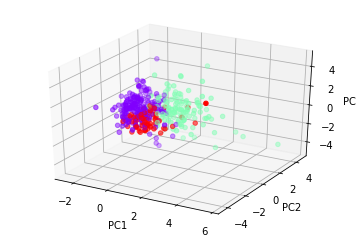

In [22]:
 from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=1, n_init=20)
model.fit(X)
model.labels_
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_scores['PC1'], pca_scores['PC2'], pca_scores['PC3'],
           c=model.labels_, cmap='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')